Import Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

COLLECTING DATASET

In [3]:
#loading dataset
wine_data = pd.read_csv('../DATA/winequalityN.csv')

In [4]:
#number of rows and columns 
wine_data.shape

(6497, 13)

In [5]:
#First 5 rows 
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
#checking missing values
wine_data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
new_wine_data = wine_data.fillna(wine_data.mean())

C:\Users\ANSH GUPTA\AppData\Local\Temp\ipykernel_25796\4257521225.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_wine_data = wine_data.fillna(wine_data.mean())


In [8]:
new_wine_data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [48]:
new_wine_data= new_wine_data.drop('type',axis=1)

Data Analylisis and viz.

In [49]:
# statistical measures
new_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


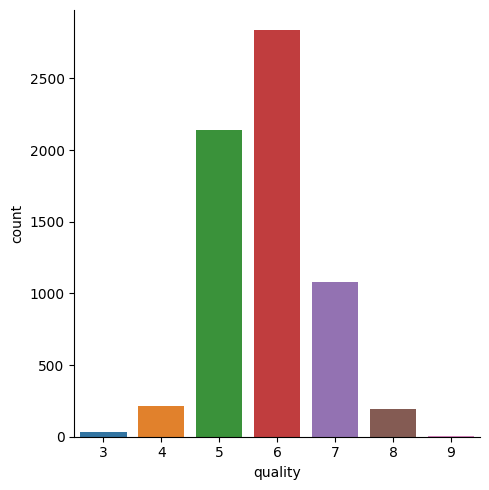

In [50]:
# number of values for each quality
sns.catplot(x='quality',data=new_wine_data, kind='count')

<AxesSubplot: xlabel='quality', ylabel='volatile acidity'>

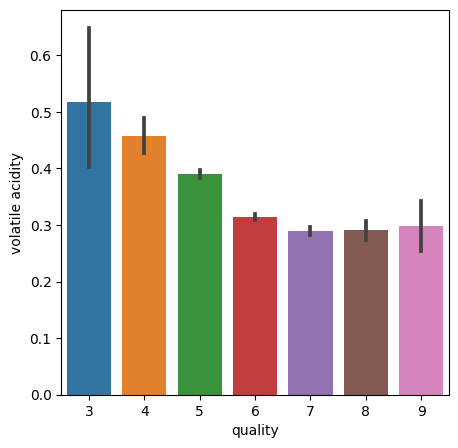

In [51]:
# volatile acidity vs quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality',y = 'volatile acidity',data= new_wine_data)

volatile acidity  is inversly propotional to quality

<AxesSubplot: xlabel='quality', ylabel='citric acid'>

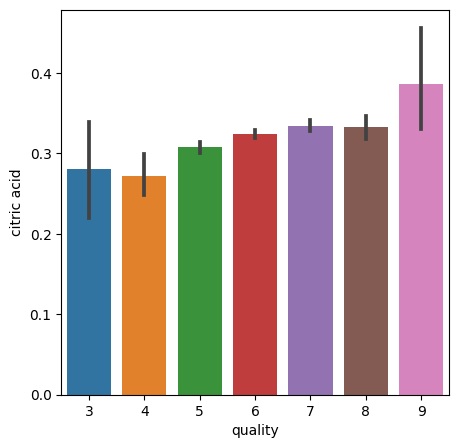

In [52]:
# citric acid vs quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality',y = 'citric acid',data= new_wine_data)

citric acid is directly propotinal to quality

<AxesSubplot: xlabel='quality', ylabel='residual sugar'>

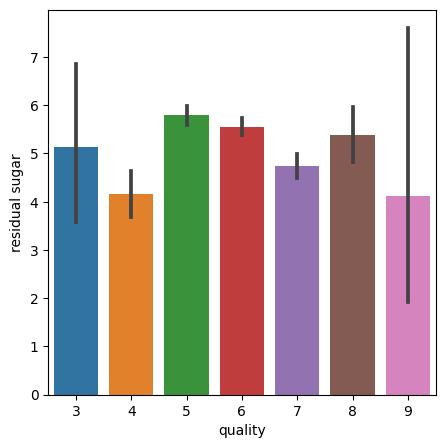

In [53]:
# residual sugar vs quality
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality',y = 'residual sugar',data= new_wine_data)

no relevent relation

CORRELATION

In [54]:
correlation = new_wine_data.corr()

In [55]:
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219918,0.323349,-0.112219,0.298282,-0.283237,-0.329409,0.458941,-0.251683,0.300225,-0.095560,-0.076967
volatile acidity,0.219918,1.000000,-0.377759,-0.196578,0.377122,-0.353055,-0.414706,0.271107,0.260283,0.225313,-0.038215,-0.265838
citric acid,0.323349,-0.377759,1.000000,0.142451,0.039310,0.133426,0.195148,0.096307,-0.328354,0.057564,-0.010431,0.085699
residual sugar,-0.112219,-0.196578,0.142451,1.000000,-0.128887,0.403242,0.495704,0.552487,-0.266717,-0.185716,-0.359656,-0.036819
chlorides,0.298282,0.377122,0.039310,-0.128887,1.000000,-0.194978,-0.279547,0.362580,0.044754,0.395073,-0.256844,-0.200818
free sulfur dioxide,-0.283237,-0.353055,0.133426,0.403242,-0.194978,1.000000,0.720934,0.025717,-0.145116,-0.188471,-0.179838,0.055463
total sulfur dioxide,-0.329409,-0.414706,0.195148,0.495704,-0.279547,0.720934,1.000000,0.032395,-0.237523,-0.275291,-0.265740,-0.041385
density,0.458941,0.271107,0.096307,0.552487,0.362580,0.025717,0.032395,1.000000,0.011913,0.259432,-0.686745,-0.305858
pH,-0.251683,0.260283,-0.328354,-0.266717,0.044754,-0.145116,-0.237523,0.011913,1.000000,0.191075,0.120939,0.019356
sulphates,0.300225,0.225313,0.057564,-0.185716,0.395073,-0.188471,-0.275291,0.259432,0.191075,1.000000,-0.003261,0.038713


<AxesSubplot: >

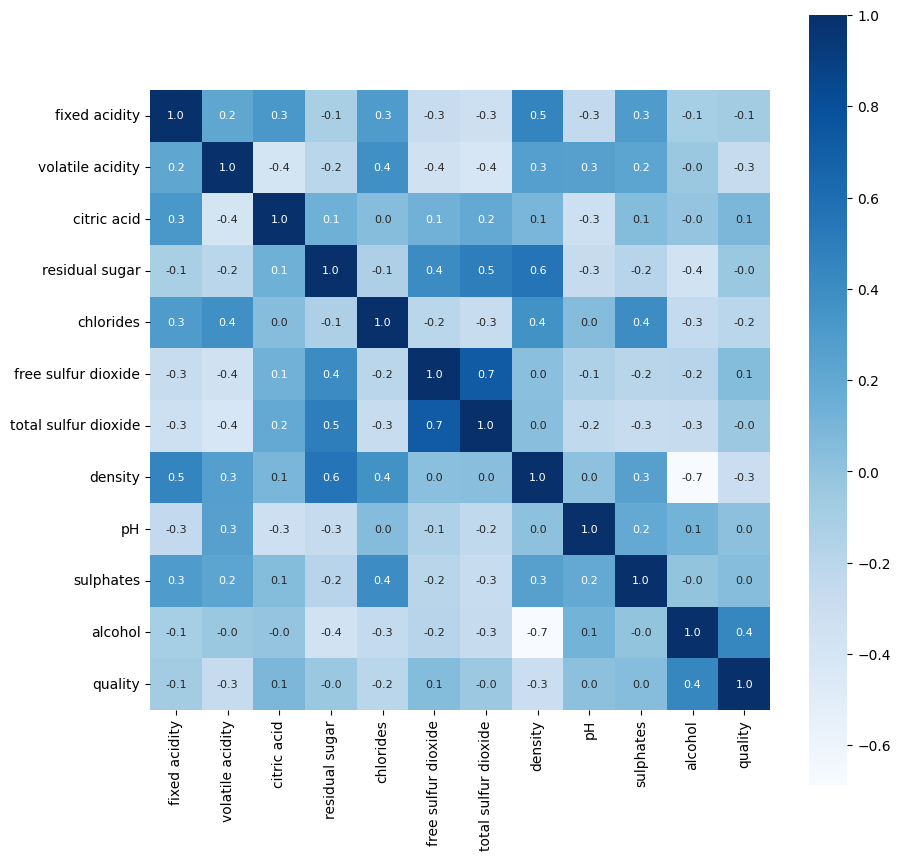

In [56]:
#constructing a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True,fmt='.1f', annot=True, annot_kws={'size':8},cmap='Blues' )

DATA PREPROCESSING

In [57]:
#Seperation of data and Label
X= new_wine_data.drop('quality',axis=1)

In [58]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2


LABEL BINARIZATION

In [59]:
Y = new_wine_data['quality'].apply( lambda y_value : 1 if y_value >=7 else 0)

TEST AND TRAIN DATA 

In [60]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [61]:
print(Y.shape, Y_train.shape , Y_test.shape)

(6497,) (5197,) (1300,)


### MODEL TRAINING

RANDOM FOREST CLASSIFIER

In [63]:
model = RandomForestClassifier()

In [64]:
model.fit(X_train,Y_train)

RandomForestClassifier()

MODEL EVALUATION

In [65]:
#accuracy on test data 
X_test_predict = model.predict(X_test)

In [66]:
test_data_accuracy = accuracy_score(X_test_predict,Y_test)

In [67]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.8992307692307693


BUILDING A PREDICTING SYSTEM 

In [72]:
input_data = (6.2,0.66,0.48,1.2,0.029,29,75,0.9892,3.33,0.39,12.8)

#changing to numpy array
input_array= np.asarray(input_data)

#reshaping the data for only one instance

input_data_reshape = input_array.reshape(1,-1)

In [73]:
predict= model.predict(input_data_reshape)

c:\Users\ANSH GUPTA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [74]:
print(predict)

[1]


In [75]:
if predict[0]==1 :
    print(' ITS A GOOD QUALITY WINE')
else:
    print('ITS A BAD QUALITY WINE')

 ITS A GOOD QUALITY WINE


SAVING MODEL

In [76]:
import joblib

# Save the model using joblib
joblib.dump(model, 'wine_quality_model.pkl')

['wine_quality_model.pkl']